In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import plotly.express as px

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape

(891, 12)

In [3]:
# train[train['Age']==np.NaN]
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(train.isna().sum())
print(train.shape)
print('')
print(test.isna().sum())
print(test.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 11)


In [5]:
print(train.dtypes)
print('')
test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
print(train.groupby(['Sex'])['Age'].mean().round(0))
print('')
print(test.groupby(['Sex'])['Age'].mean().round(0))

Sex
female    28.0
male      31.0
Name: Age, dtype: float64

Sex
female    30.0
male      30.0
Name: Age, dtype: float64


In [7]:
train['Age'] = train['Age'].fillna(train.groupby('Sex')['Age'].transform('mean'))
train['Age']=train['Age'].round(0)

test['Age'] = test['Age'].fillna(test.groupby('Sex')['Age'].transform('mean'))
test['Age']=test['Age'].round(0)

In [8]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [9]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,31.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


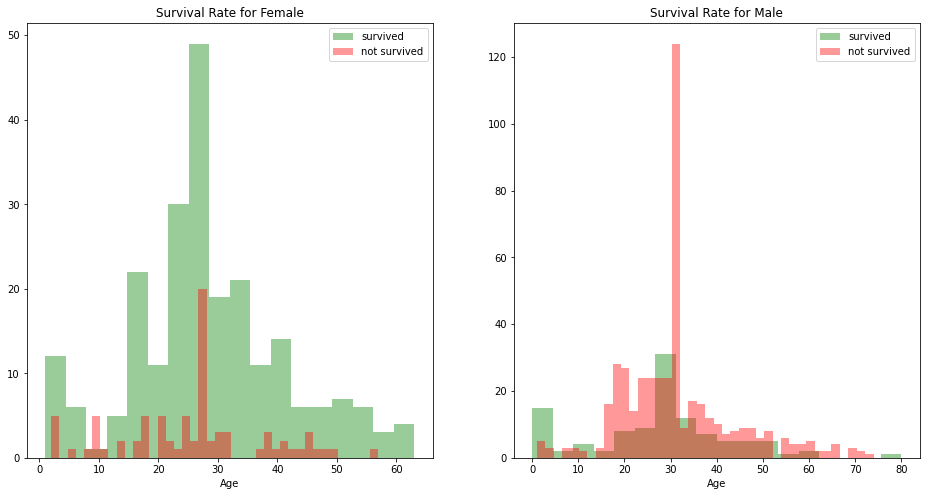

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Survival Rate for Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Survival Rate for Male');

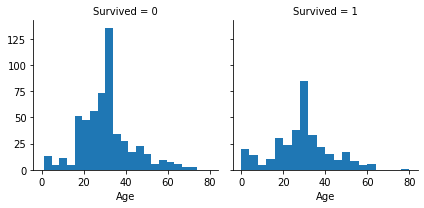

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [13]:
for template in ["plotly"]:
    fig = px.scatter(train,
                     x="PassengerId", y="Age", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Which Age Survived?")
    fig.show()

In [14]:
for col in train.columns:
    if train[col].isnull().mean()*100>40:
        train.drop(col,axis=1,inplace=True)
    


for col in test.columns:
    if test[col].isnull().mean()*100>40:
        test.drop(col,axis=1,inplace=True)

In [15]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [16]:
print(train.isna().sum())
print(train.shape)

print('')

print(test.isna().sum())
print(test.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(891, 11)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(418, 10)


In [17]:
Corr = train.select_dtypes(exclude=["object"]).corr()
abs_corr_on_saleprice = abs(Corr[['Survived']].copy())
abs_corr_on_saleprice.drop('Survived', axis=0, inplace=True)

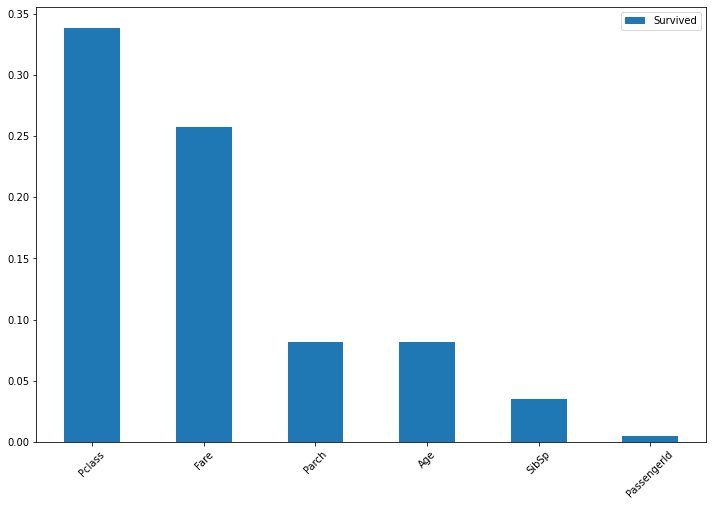

In [18]:
abs_corr_on_saleprice.sort_values(by='Survived', ascending=False).plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

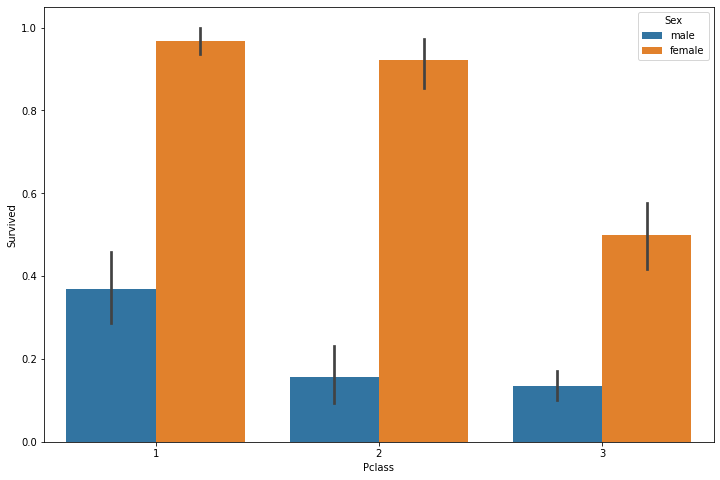

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train,)

In [20]:
def set_age(train):

  train.loc[ train['Age'] <= 16, 'Age'] = 0
  train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
  train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
  train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
  train.loc[ train['Age'] > 64, 'Age']
  train['Age'] = train['Age'].astype(int)


  return train

train=set_age(train)
test=set_age(test)

In [21]:
def set_fare(train):

  train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
  train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
  train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
  train.loc[ train['Fare'] > 31, 'Fare'] = 3
  train['Fare'] = train['Fare'].astype(int)

  return train


train=set_fare(train)
test=set_fare(test)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,S
5,6,0,3,"Moran, Mr. James",male,1,0,0,330877,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,3,0,0,17463,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,0,2,347742,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,237736,2,C


In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,2,0,0,330911,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,1,Q
3,895,3,"Wirz, Mr. Albert",male,1,0,0,315154,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,1,S


In [23]:
integer_columns=train.select_dtypes(include=['int64','float64']).columns.tolist()

In [24]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtypes == object:
        train[col]= le.fit_transform(train[col])



for col in test.columns:
    if test[col].dtypes == object:
        test[col]= le.fit_transform(test[col])

In [25]:
print(train.dtypes)
print('')
print(test.dtypes)

PassengerId    int64
Survived       int64
Pclass         int64
Name           int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Ticket         int64
Fare           int64
Embarked       int64
dtype: object

PassengerId    int64
Pclass         int64
Name           int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Ticket         int64
Fare           int64
Embarked       int64
dtype: object


In [26]:
train = train.drop(['Ticket','Name', 'PassengerId'], axis=1)
test = test.drop(['Ticket','Name'], axis=1)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,2
1,1,1,0,2,1,0,3,0
2,1,3,0,1,0,0,1,2
3,1,1,0,2,1,0,3,2
4,0,3,1,2,0,0,1,2
5,0,3,1,1,0,0,1,1
6,0,1,1,3,0,0,3,2
7,0,3,1,0,3,1,2,2
8,1,3,0,1,0,2,1,2
9,1,2,0,0,1,0,2,0


In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2,0,0,0,1
1,893,3,0,2,1,0,0,2
2,894,2,1,3,0,0,1,1
3,895,3,1,1,0,0,1,2
4,896,3,0,1,1,1,1,2


In [28]:
X=train.drop(['Survived'], axis = 1)
Y=train['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,0,2
1,1,0,2,1,0,3,0
2,3,0,1,0,0,1,2
3,1,0,2,1,0,3,2
4,3,1,2,0,0,1,2


In [29]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [31]:
# decision_tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.66

In [32]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.66

In [33]:
# KNN Classifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

acc_LinearRegression = round(classifier.score(X_train, Y_train) * 100, 2)
acc_LinearRegression

85.3

In [34]:
Y_pred=classifier.predict(X_test)

In [35]:
submission1 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission1.to_csv('submission1.csv', index=False)